In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
# reading dataset
df = pd.read_csv(r'C:\Users\admin\Desktop\diabetes.csv')
# Obtaining first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [77]:
# Obtaining rows and columns
df.shape

(2000, 9)

In [78]:
# Obtaining feature names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [79]:
# Obtaining statistics information of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [80]:
# Obtaining rudimentary information of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [81]:
# Checking the number of null values present in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Acquires Diabetes')

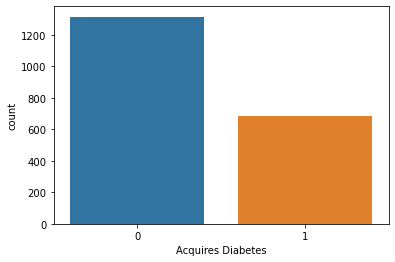

In [82]:
# Finding the count of patients having diabetes or not
sns.countplot(df['Outcome'])
plt.xlabel('Acquires Diabetes')

In [83]:
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose',
                                                                                'BloodPressure', 'SkinThickness',
                                                                                    'Insulin', 'BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292B76CE130>,
      dtype=object)

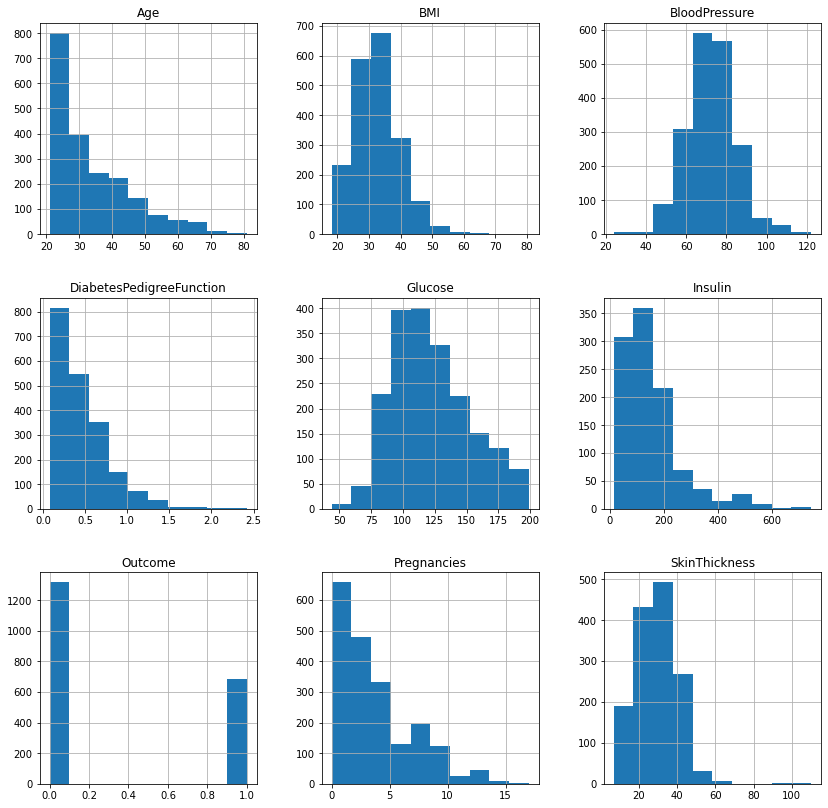

In [84]:
# Plotting histograms for all numeric features to understand the distribution
df_copy.hist(figsize = (14,14))

In [85]:
# Replacing null values with mean and median based on the distribution plotted above
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292AF024D90>,
      dtype=object)

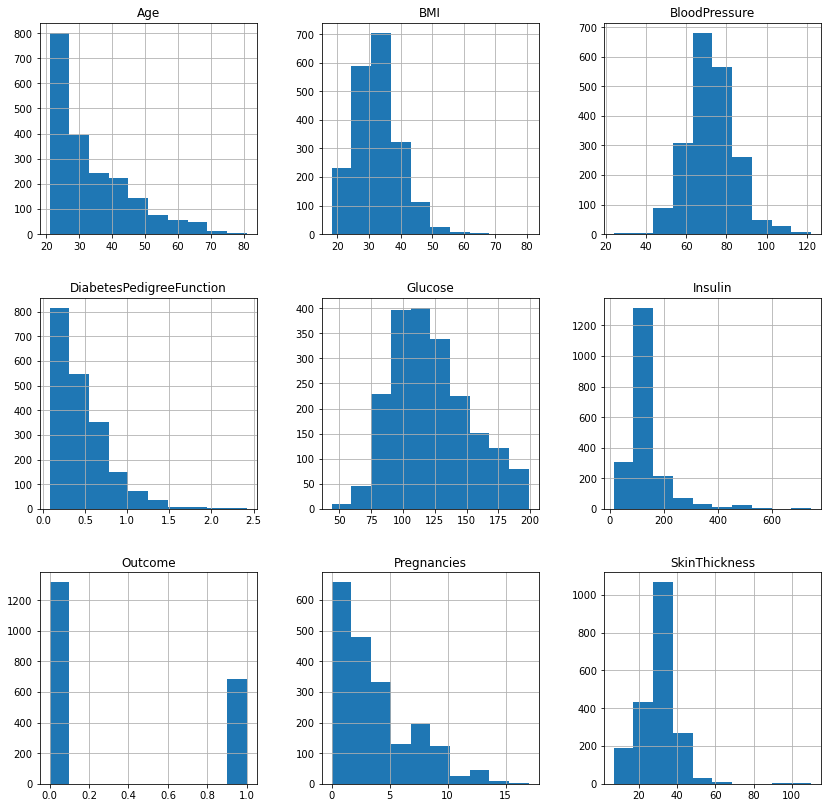

In [86]:
# Plotting histograms for all numeric features to understand the distribution after replacing nan values
df_copy.hist(figsize = (14,14))

In [87]:
# Checking if null values has been replaced
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [88]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y, shuffle=True)
print('Shape of X_train = {} and X_test = {}'.format(X_train.shape, X_test.shape))

Shape of X_train = (1600, 8) and X_test = (400, 8)


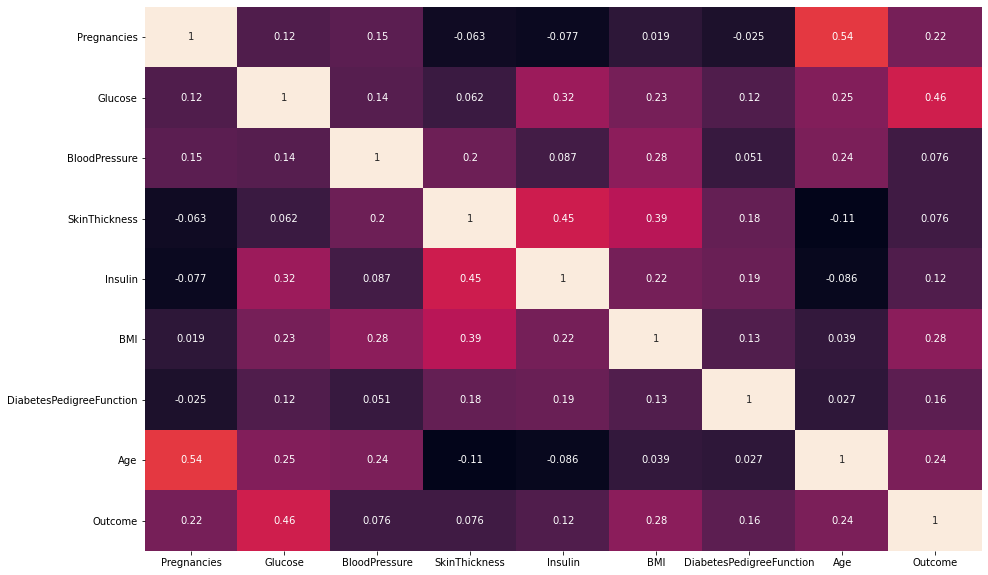

In [89]:
# Plotting a heatmap to find correlations
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cbar=False)

In [90]:
# Finding correlation between features
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
print('Highly correlated features (Number of features = {}) = {}'.format(len(set(corr_features)), corr_features))

Highly correlated features (Number of features = 0) = set()


In [91]:
# Applying feature scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
# Selecting the best model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC()]

df_clf = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Accuracy'])

for clf in clf_list:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    clf_name = str(type(clf)).split('.')[-1][:-2]

    train = round(clf.score(X_train, y_train), 3)
    
    test = round(clf.score(X_test, y_test), 3)
    
    accuracy = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    cv = round(accuracy.mean()*100, 3)

    df_clf = df_clf.append({'Name': clf_name, 'Train Score': train, 'Test Score': test, 'Mean Accuracy': cv},
                  ignore_index=True)

df_clf

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

,Name,Train Score,Test Score,Mean Accuracy
0,LogisticRegression,0.777,0.808,77.312
1,DecisionTreeClassifier,1.000,0.980,93.812
2,RandomForestClassifier,1.000,0.988,95.562
3,AdaBoostClassifier,0.815,0.800,79.125
4,SVC,0.856,0.832,80.562


In [93]:
# Using RandomizedSearchCV to obtain higher test accuracy
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth': [5, 10 ,20, 50, 75, 100, 200 ,250],
        'max_features' : ['auto', 'sqrt', 'log2'],
        'bootstrap' : [True, False],
        'criterion' : ['gini', 'entropy'],
        'n_estimators': [100, 200, 300, 400, 500, 750 ,1000]
    }

rs = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params ,n_iter=100, cv=5, verbose=3,
                               random_state=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 50, 75, 100,
                                                      200, 250],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 750, 1000]},
                   random_state=100, scoring='accuracy', verbose=3)

In [94]:
print(rs.best_score_)
print()
print(rs.best_params_)

0.9574999999999999

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 250, 'criterion': 'gini', 'bootstrap': True}


In [95]:
# Using GridSearchCV to obtain higher test accuracy
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': np.arange(900, 1200, 50)
    }
gs = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt', criterion='gini', bootstrap=True),
                  param_grid=params ,cv=5, verbose=3, 
                  n_jobs=-1, scoring='accuracy')
gs.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  30 | elapsed:   14.0s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.5s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features='sqrt'),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 900,  950, 1000, 1050, 1100, 1150])},
             scoring='accuracy', verbose=3)

In [96]:
print(gs.best_score_)
print()
print(gs.best_params_)

0.9575000000000001

{'n_estimators': 1150}


In [114]:
# Building the final model
rf = RandomForestClassifier(n_estimators=950, max_features='sqrt', criterion='gini', bootstrap=True, max_depth=100)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [115]:
# Obtaining confusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Confusion Matrix for train dataset \n{}'.format(confusion_matrix(y_train, y_pred_train)))
print()
print('Confusion Matrix for test dataset \n{}'.format(confusion_matrix(y_test, y_pred_test)))
print()
print('Accuracy for test = {}'.format(accuracy_score(y_test, y_pred_test)))
print()
print(classification_report(y_test, y_pred))

Confusion Matrix for train dataset 
[[1053    0]
 [   0  547]]

Confusion Matrix for test dataset 
[[258   5]
 [  2 135]]

Accuracy for test = 0.9825

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       263
           1       0.78      0.72      0.75       137

    accuracy                           0.83       400
   macro avg       0.82      0.80      0.81       400
weighted avg       0.83      0.83      0.83       400



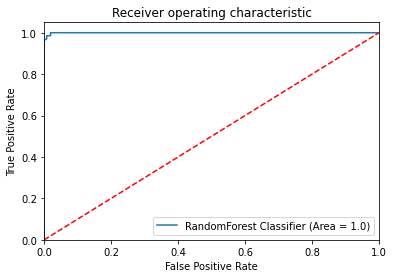

In [117]:
# Plotting roc_auc curve
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='RandomForest Classifier (Area = {})'.format(round(roc_auc), 3))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()

In [118]:
# Finding Prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return rf.predict(x)

In [119]:
# Sample prediction 1
pred1 = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if pred1:
  print('The patient has diabetes')
else:
  print('The patient does not have diabetes')

The patient does not have diabetes


In [120]:
# Sample predicition 2
pred2 = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if pred2:
  print('The patient has diabetes')
else:
  print('The patient does not have diabetes')

The patient has diabetes
